In [1]:
# %pip install tensorflow==2.13 matplotlib

# Question-1
Write a Python code to build a deep neural network using Keras and compute a number of parameters, memory and FLOPs for the following model. Use relu activations functions in the hidden layers and sigmoid activations function in the output layers.


CPU that performs 1 GFLOPS (1,000,000,000) per seconds and computes the inference time of the Deep neural network model.



<img src="2.png" width="700" height="500">


##  Parameters calculation in Deep neural network

The number of internal parameters in a neural network is the total number of weights + the total number of biases. The total number of weights equals the sum of the products of each pair of adjacent layers. The total number of biases equals the number of hidden neurons + the number of output neurons.

## Model Size calculations


Model Size (in bytes)=Number of Parameters×Bytes Per Parameter
Model Size (in KB)=Model Size (in bytes)/1024

##  FLOPs calculation in Deep neural network
FLOPs of  FC=2*(input size x output size )+(output size x activation)

## Activation functions FLOPS for  Tensor Flow

Relu  -->      1FLOPs

Sigmoid   -->   1FLOPs

Tanh   -->      1FLOPs

Softmax    -->  6FLOPs

## Infrences time calculations

The inference time = FLOPs/FLOPS.

FLOPs-> measures computational complexity of the model.

FLOPS-> measures the hardware’s processing capability



In [2]:
%pip list | grep tensorflow

tensorflow                   2.13.0
tensorflow-estimator         2.13.0
tensorflow-io-gcs-filesystem 0.37.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
# %pip install tensorflow==2.13

In [4]:
### Write  your code here
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Conv3D, MaxPooling3D, Flatten, Dense,MaxPool2D

model=Sequential([Dense(5,activation='relu',input_shape=(5,)),
                  Dense(5,activation='relu'),
                  Dense(1,activation='relu')
                  ])


model.summary()

2025-02-04 14:08:38.072333: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-04 14:08:38.603746: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-04 14:08:38.606605: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-04 14:08:41.243876: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66 (264.00 Byte)
Trainable params: 66 (264.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.count_params()

66

In [6]:
def compute(model) -> tuple:
    """
    Returns : total params, total flops
    """

    total_params = 0
    total_flops = 0

    acti_flops_map = {
        "relu": 1,
        "sigmoid": 1,
        "tanh": 1,
        "softmax": 6,
    }

    for layer in model.layers:
        layertype = layer.__class__.__name__
        acti_flops = 0
        acti = getattr(layer, "activation", None)
        acti_name = acti.__name__ if acti else None

        if layertype in ["Dense"]:
            inputunits = layer.input_shape[-1]
            outputunits = layer.output_shape[-1]
            param = inputunits * outputunits + outputunits
            flops = 2 * outputunits * inputunits
            acti_flops = outputunits * acti_flops_map.get(acti_name, 0)

        elif layertype in ["Conv2D", "Conv3D"]:
            kernel_size = layer.kernel_size
            input_shape = layer.input_shape
            output_shape = layer.output_shape
            filters = layer.filters

            param = (
                filters * kernel_size[0] * kernel_size[1] * input_shape[-1]
            ) + filters

            output_elements = output_shape[1] * output_shape[2] * filters
            flops = (
                2 * kernel_size[0] * kernel_size[1] * input_shape[-1] * output_elements
            )
            acti_flops = output_elements * acti_flops_map.get(acti_name, 0)

        else:
            param = 0
            flops = 0

        total_params += param
        total_flops += flops + acti_flops

    bytes_per_param = 4
    total_size = total_params * bytes_per_param

    return total_params, total_flops, total_size

In [7]:
def print_metrics(total_params, total_flops, total_size):
    print(f"total parameters : {total_params}\ntotal flops : {total_flops}\ntotal size : {total_size} bytes")

p1,f1,s1 = compute(model)
print_metrics(p1,f1,s1)

total parameters : 66
total flops : 121
total size : 264 bytes


# Question-2
Write a Python code to build a deep neural network using Keras and compute a number of parameters, memory and FLOPs for the following model. Use relu activations functions in the hidden layers and softmax activations function in the output layers. Write a Python code plot  the bar graph of the question 1 and question 2 output and compare.



<img src="1.png" width="700" height="500">

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    Conv3D,
    MaxPooling3D,
    Flatten,
    Dense,
    MaxPool2D,
)

model = Sequential(
    [
        Dense(9, activation="relu", input_shape=(4,)),
        Dense(6, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 45        
                                                                 
 dense_4 (Dense)             (None, 6)                 60        
                                                                 
 dense_5 (Dense)             (None, 3)                 21        
                                                                 
Total params: 126 (504.00 Byte)
Trainable params: 126 (504.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
p2, f2, s2 = compute(model)
print_metrics(p2, f2, s2)

total parameters : 126
total flops : 249
total size : 504 bytes


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame(data=[[p1,f1,s1],[p2,f2,s2]], columns=["params","flops","size(bytes)"], index=["model1", "model2"])
df.head()

,params,flops,size(bytes)
model1,66,121,264
model2,126,249,504


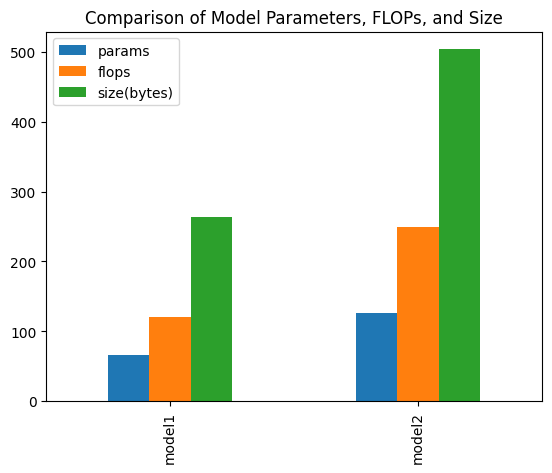

In [11]:
df.plot(kind='bar')
plt.title('Comparison of Model Parameters, FLOPs, and Size')
plt.show()

## Output Dimensions Formula for 2D Convolution
<img src="10.png" width="600" height="400">

## Parameter calculation of 2DCNN


<img src="4.png" width="400" height="200">

## FLOPs calculation of 2DCNN
<img src="6.png" width="600" height="400">



## FLOPs calculation for Pooling Layers
<img src="12.png" width="600" height="400">


# Question-3

Write a Python code build 2DCNN model for the following specifications using Keras and compute the number of parameters ,model size and FLOPs

The model architecture consists of several layers designed for image classification tasks, such as recognizing digits from the MNIST dataset. The architecture begins with a 2D convolutional layer (Conv2D), which applies 32 filters of size 3x3 to the input image (28x28x1), followed by the ReLU activation function to introduce non-linearity. This is followed by a max-pooling layer (MaxPooling2D) with a pool size of 2x2, reducing the spatial dimensions of the feature maps while retaining important information. A second convolutional layer with 64 filters of size 3x3 is then applied, again using ReLU activation. Another max-pooling layer  (2x2 ) follows to further downsample the feature maps. The output of the convolutional layers is then flattened into a one-dimensional vector using the Flatten layer, which is fed into the fully connected dense layers. The first dense layer has 64 neurons with ReLU activation, allowing the model to learn complex representations, while the final dense layer has 10 neurons with a softmax activation function, providing probabilities for each of the 10 possible digit classes.


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    Conv3D,
    MaxPooling3D,
    Flatten,
    Dense,
    MaxPool2D,
)

model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        MaxPool2D((2, 2)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPool2D((2, 2)),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [13]:
print_metrics(*compute(model))

total parameters : 121930
total flops : 5085500
total size : 487720 bytes


# Question-4
Write a Python code to build CNN using Keras and compute a  number of parameters,memory and FLOPs for the following model.





<img src="3.jpg" width="900">

In [14]:
model=Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                  MaxPool2D((2,2)),
                  Conv2D(64,(3,3),activation='relu'),
                  MaxPool2D((2,2)),
                  Flatten(),
                  Dense(64,activation='relu'),
                  Dense(10,activation='softmax')
                  ])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [15]:
print_metrics(*compute(model))

total parameters : 121930
total flops : 5085500
total size : 487720 bytes


## Output Shape of 3DCNN

<img src="13.png" width="400" height="300">
<img src="14.png" width="400" height="300">






### 3DCNN parameters calculations
<img src="7.png" width="900" height="700">


### 3DCNN FLOPs calculations

<img src="8.png" width="900" height="700">



### 3DCNN FLOPs calculation for Pooling Layers
<img src="15.png" width="900" height="700">


# Question-5

You are tasked with designing a 3D Convolutional Neural Network (3D CNN) to classify video clips into one of five categories, such as walking, running, jumping, swimming, and cycling. Each video clip consists of 16 frames of size 64x64, and the data has a single channel (grayscale). The model should include two 3D convolutional layers followed by max-pooling layers, a flattening layer, and fully connected dense layers. Specifically, the architecture should satisfy the following requirements:

The input layer should accept a shape of (16, 64, 64, 1) corresponding to the temporal, height, width, and channel dimensions.
The first 3D convolutional layer should have 32 filters of size (3, 3, 3) and use ReLU activation.
The first max-pooling layer should have a pool size of (2, 2, 2) to downsample the feature maps.
The second 3D convolutional layer should have 64 filters of size (3, 3, 3) and use ReLU activation.
The second max-pooling layer should again have a pool size of (2, 2, 2).
The flattened layer should connect to a dense layer with 128 neurons using ReLU activation, followed by the output layer with 5 neurons and a softmax activation.
Design and implement this 3D CNN architecture, compute the number of parameters for each layer, compute the model size and compute the FLOPs.







In [16]:
### Write  your code here
model = Sequential(
    [
        Dense(5, activation="relu", input_shape=(16, 16, 64, 1)),
        Conv3D(filters=32, kernel_size=(3, 3, 3), activation="relu"),
        MaxPooling3D(pool_size=(2, 2, 2)),
        Conv3D(filters=64, kernel_size=(3, 3, 3), activation="relu"),
        MaxPooling3D(pool_size=(2, 2, 2)),
        Dense(128, activation="relu"),
        Dense(5, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16, 16, 64, 5)     10        
                                                                 
 conv3d (Conv3D)             (None, 14, 14, 62, 32)    4352      
                                                                 
 max_pooling3d (MaxPooling3  (None, 7, 7, 31, 32)      0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 5, 5, 29, 64)      55360     
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 2, 2, 14, 64)      0         
 g3D)                                                            
                                                                 
 dense_11 (Dense)            (None, 2, 2, 14, 128)    

In [17]:
print_metrics(*compute(model))

total parameters : 28943
total flops : 1511789
total size : 115772 bytes


# Question-6

A company is building a system to predict customer sentiment (positive or negative) based on a sequence of customer reviews.
Each review is represented as a feature vector of size 4, where each feature corresponds to a specific aspect of the review, such as tone, length, and keyword presence. To process this sequential data, the team decides to use a Recurrent Neural Network (RNN).

The input size n<sub>x</sub> is 4, meaning each input vector x<sup>t</sup> has 4 features.  
The hidden layer has 3 hidden units n<sub>a</sub>=3.  
The output size n<sub>y</sub> is 2, corresponding to the two possible sentiment classes (positive or negative).  
The sequence length T<sub>x</sub> is 5, meaning the RNN will process a sequence of 5 reviews at a time.
use sigmoid activation functions in the output layers and compute the number of parameters and memory in the RNN model.




<img src="9.png" width="400">


Number of parameter of RNN = g × [a(a+i) + a]

a --> hidden unit

i ---> input unit



In [18]:
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential(
    [
        SimpleRNN(3, input_shape=(5, 4), activation="tanh"),
        Dense(2, activation="sigmoid"),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 24        
                                                                 
 dense_13 (Dense)            (None, 2)                 8         
                                                                 
Total params: 32 (128.00 Byte)
Trainable params: 32 (128.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
def get_rnn_metrics(model):
    g,a,i =0,0,0
    for layer in model.layers:
        if type(layer) == SimpleRNN:
            g += 1
            a += layer.units
            i += layer.input_shape[-1]
    return g, a, i

g, a, i = get_rnn_metrics(model)

def num_params_rnn(model):
    g, a, i = get_rnn_metrics(model)
    total_params = g * (a * (a + i) + a)
    return total_params

In [20]:
def compute_metrics_general_model(model):
    p, _, s = compute(model)

    rnn_p = num_params_rnn(model)
    bytes_per_param = 4

    p += rnn_p
    s += rnn_p * bytes_per_param
    return p, s

In [21]:
p,s = compute_metrics_general_model(model)
print(f"number of parameters : {p}\nsize of model : {s} bytes")

number of parameters : 32
size of model : 128 bytes


# Question 7

Write a Python code to implement a single LSTM unit for the follwoing and compute the parameter of the follwoing model using Keras.
    
<img src="https://github.com/kmkarakaya/ML_tutorials/blob/master/images/LSTM_internal2.png?raw=true" width="500">


 Notice that we can guess the size (shape) of W,U and b given:
 * Input size ($h_{t-1}$ and $x_{t}$ )
 * Output size ($h_{t-1}$)

 Since output must equal to Hidden State (hx1) size:

  * for W param =  ($h$ × $x$)
  * for U param =  ($h$ × $h$)
  * for Biases  param =   $h$

 * total params = W param + U param + Biases param
  
    =  ($h$ × $x$) +  ($h$ × $h$) +  $h$

    =  ( ($h$ × $x$) +  ($h$ × $h$) +   $h$ )

    =  ( ($x$ + $h$) ×  $h$  +   $h$ )

* there are 4 functions which are exactly defined in the same way, in the LSTM layer, there will be

 ##   **LSTM parameter number = 4 × (($x$ + $h$) × $h$ +$h$)**



In [22]:
from tensorflow.keras.layers import LSTM

model = Sequential([
    LSTM(units=3, input_shape=(None, 3))
     # None: is present at the start to specify variable length sequences
     # 3 is for the number of features in each time step
])

In [23]:
def compute_lstm_params(layer:LSTM):
    x = layer.input_shape[-1]
    h = layer.units
    w_params = h*x
    u_params = h*h
    biases_params = h
    total_params = w_params + u_params + biases_params
    return total_params

In [24]:
params = compute_lstm_params(model.layers[0])
print(f"Number of parameters : {params}")

Number of parameters : 21
